# Library imports

In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data preparation

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled_array = StandardScaler().fit_transform(df_market_data)

# Display the first 3 rows of the scaled data
df_market_data_scaled_array[0:3]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051]])

In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    df_market_data_scaled_array,
    columns=df_market_data.columns
)
df_market_data_scaled.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
5,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
6,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
7,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
8,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351
9,0.448952,-0.190684,-0.248043,0.051634,-0.529666,-0.532961,-0.206029


In [7]:
# Copy the crypto names from the original data
crypto_names = df_market_data.index

# Set the coinid column as index
df_market_data_scaled.index = crypto_names

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))
k


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [9]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k

for i in k:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=2)
    # 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(df_market_data_scaled)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)


c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memor

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_curve = pd.DataFrame(elbow_curve_data)

# Review the DataFrame
df_elbow_curve.head()


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,63.858668


In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_curve.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve - Determining the Optimal Number of Clusters",
    xticks=k
    )


:Curve   [k]   (inertia)

In [12]:
# Additional Code for Future Reference:
# Using kneed to find the optimal number of clusters

# Import the necessary library
from kneed import KneeLocator

# Use the KneeLocator to find the optimal number of clusters
kneedle = KneeLocator(
    df_elbow_curve["k"], df_elbow_curve["inertia"],
    curve="convex",
    direction="decreasing"
)

# Print the optimal number of clusters
optimal_clusters = kneedle.elbow
print(f"The optimal number of clusters is: {optimal_clusters}")


The optimal number of clusters is: 4


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Visually, the Elbow curve suggests that the optimal number of clusters is 4.

*Aside* - I have also explored the `KneeLocator` in the library `kneed`. This function is a more advanced method for finding the optimal number of clusters. Using this method, I found that the optimal number of clusters is 4, which agreed with the visual analysis.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

**KMeans Clustering:** 

This is a clustering algorithm used to partition the data into k clusters. The number of clusters is determined using techniques like the elbow method. The clusters are based on the structure and distribution of the data.

In [13]:
# Initialise the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=2)

In [14]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=2)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(df_market_data_scaled)

# Create a copy of the DataFrame
df_market_data_scaled_predictions_kmeans = df_market_data_scaled.copy()

# Add column to the DataFrame with the predicted clusters
df_market_data_scaled_predictions_kmeans["cluster"] = k_4

# Display the dataframe with the predicted clusters
df_market_data_scaled_predictions_kmeans.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_market_data_scaled_predictions_kmeans.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters (K-Means)",
    width=800,
    height=400,
    rot=90
)


:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

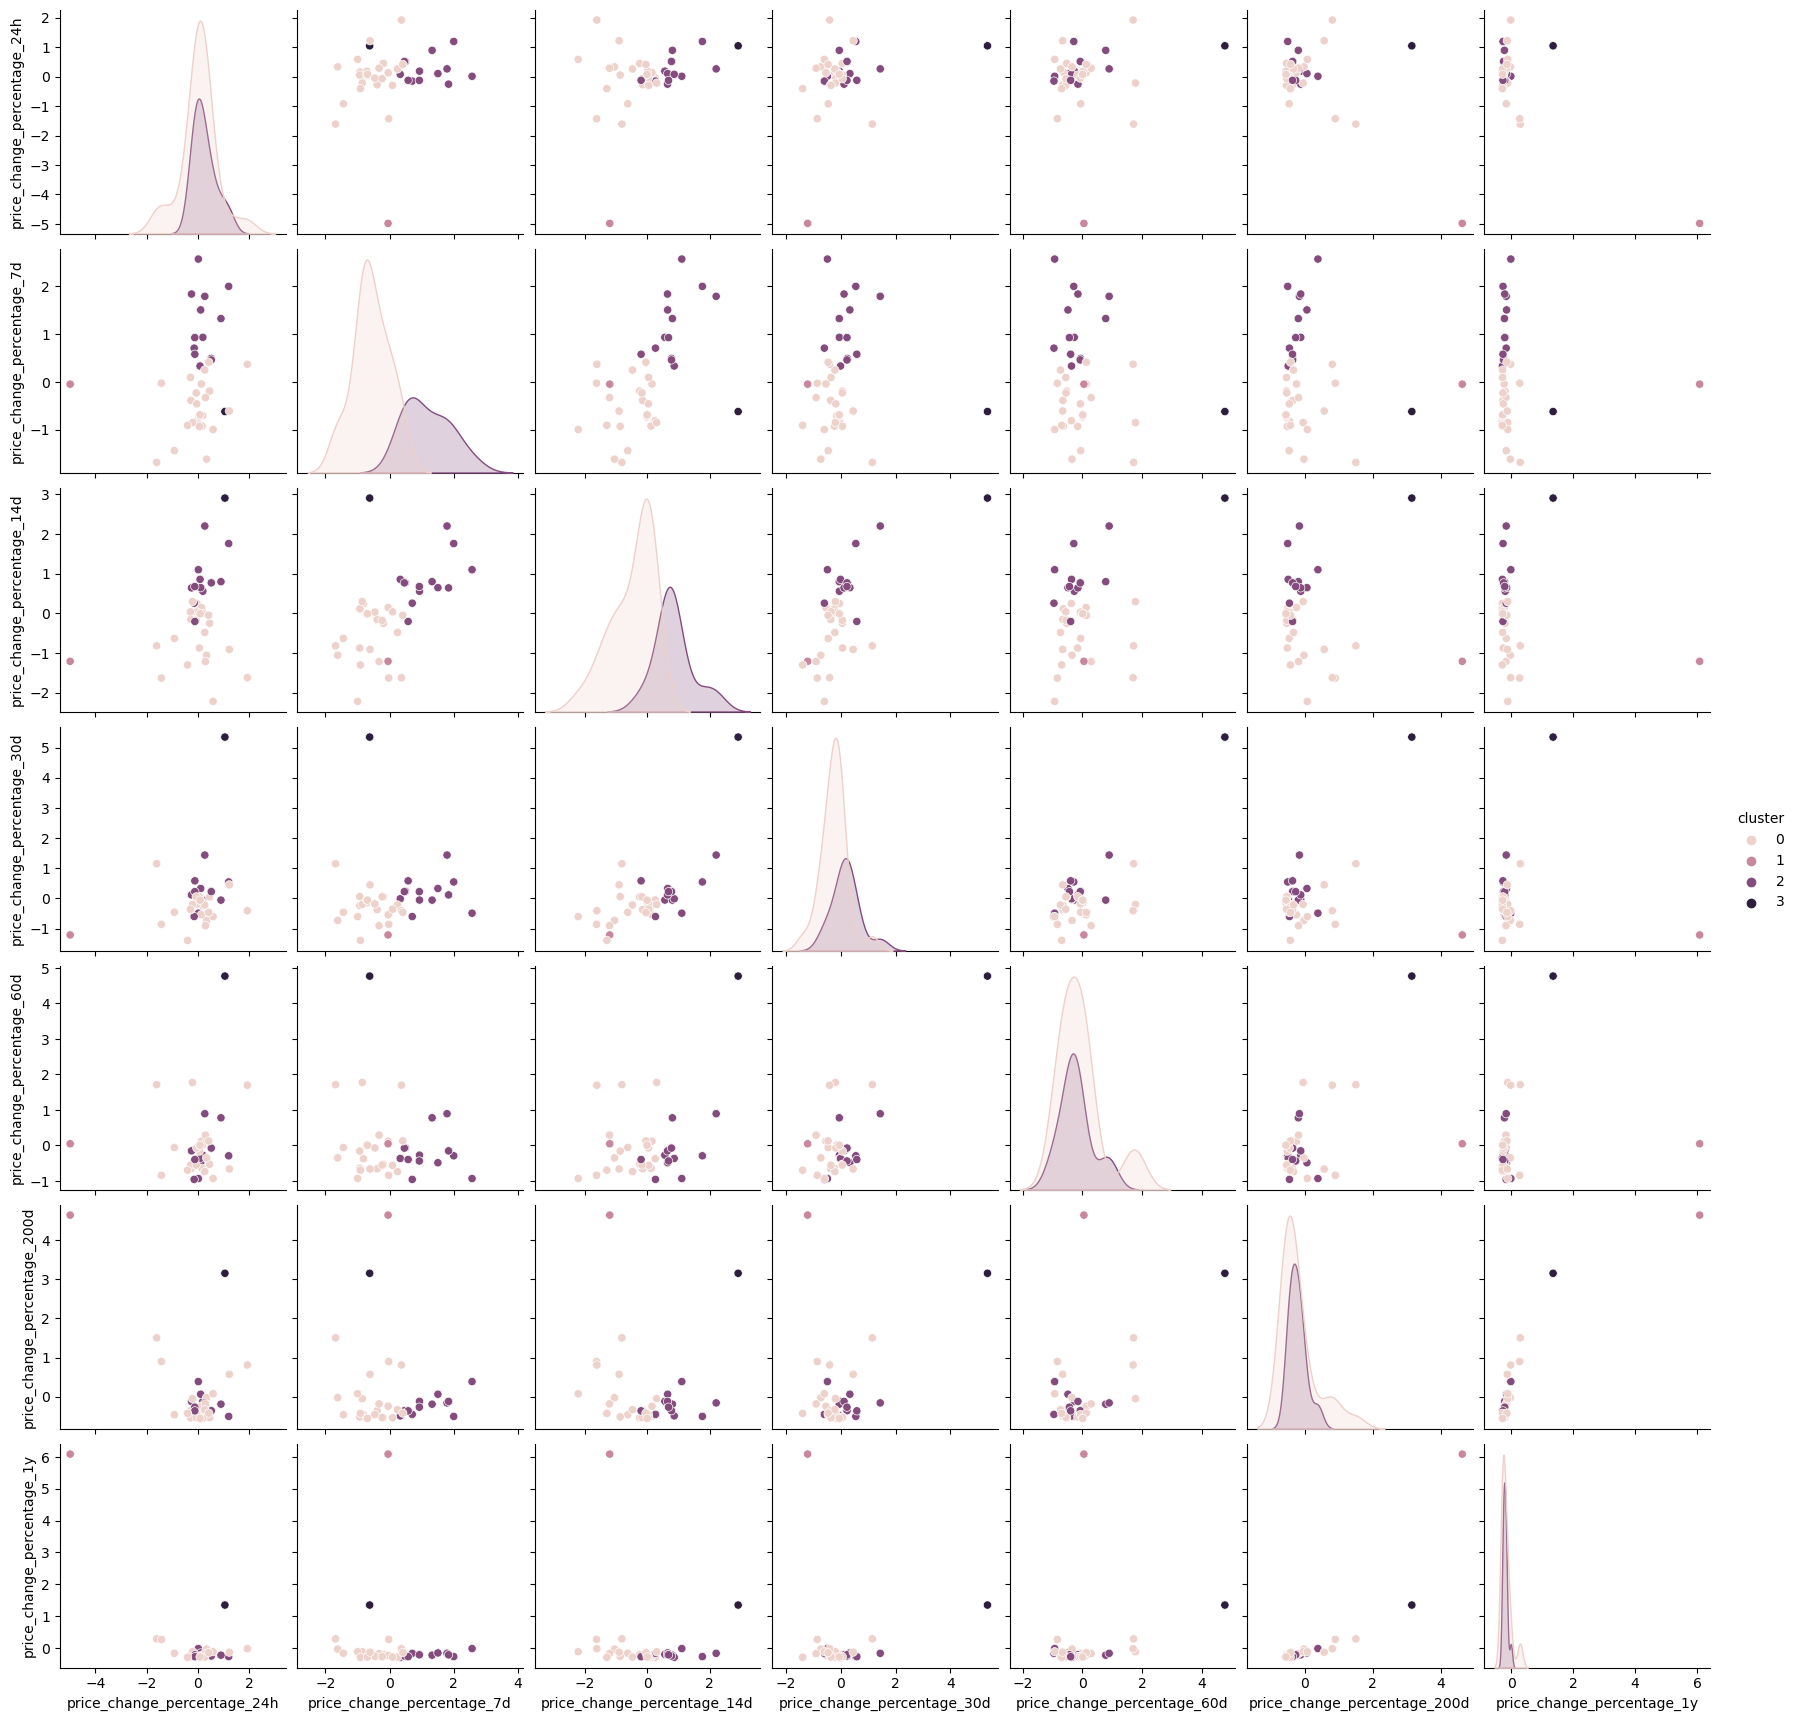

In [17]:
# Additional Code for Future Reference:
# Using seaborn to visualise all pairs of columns in the DataFrame.

import seaborn as sns
import matplotlib.pyplot as plt

# Generate pair plot colored by cluster
sns.pairplot(df_market_data_scaled_predictions_kmeans, hue='cluster')
plt.show()


c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

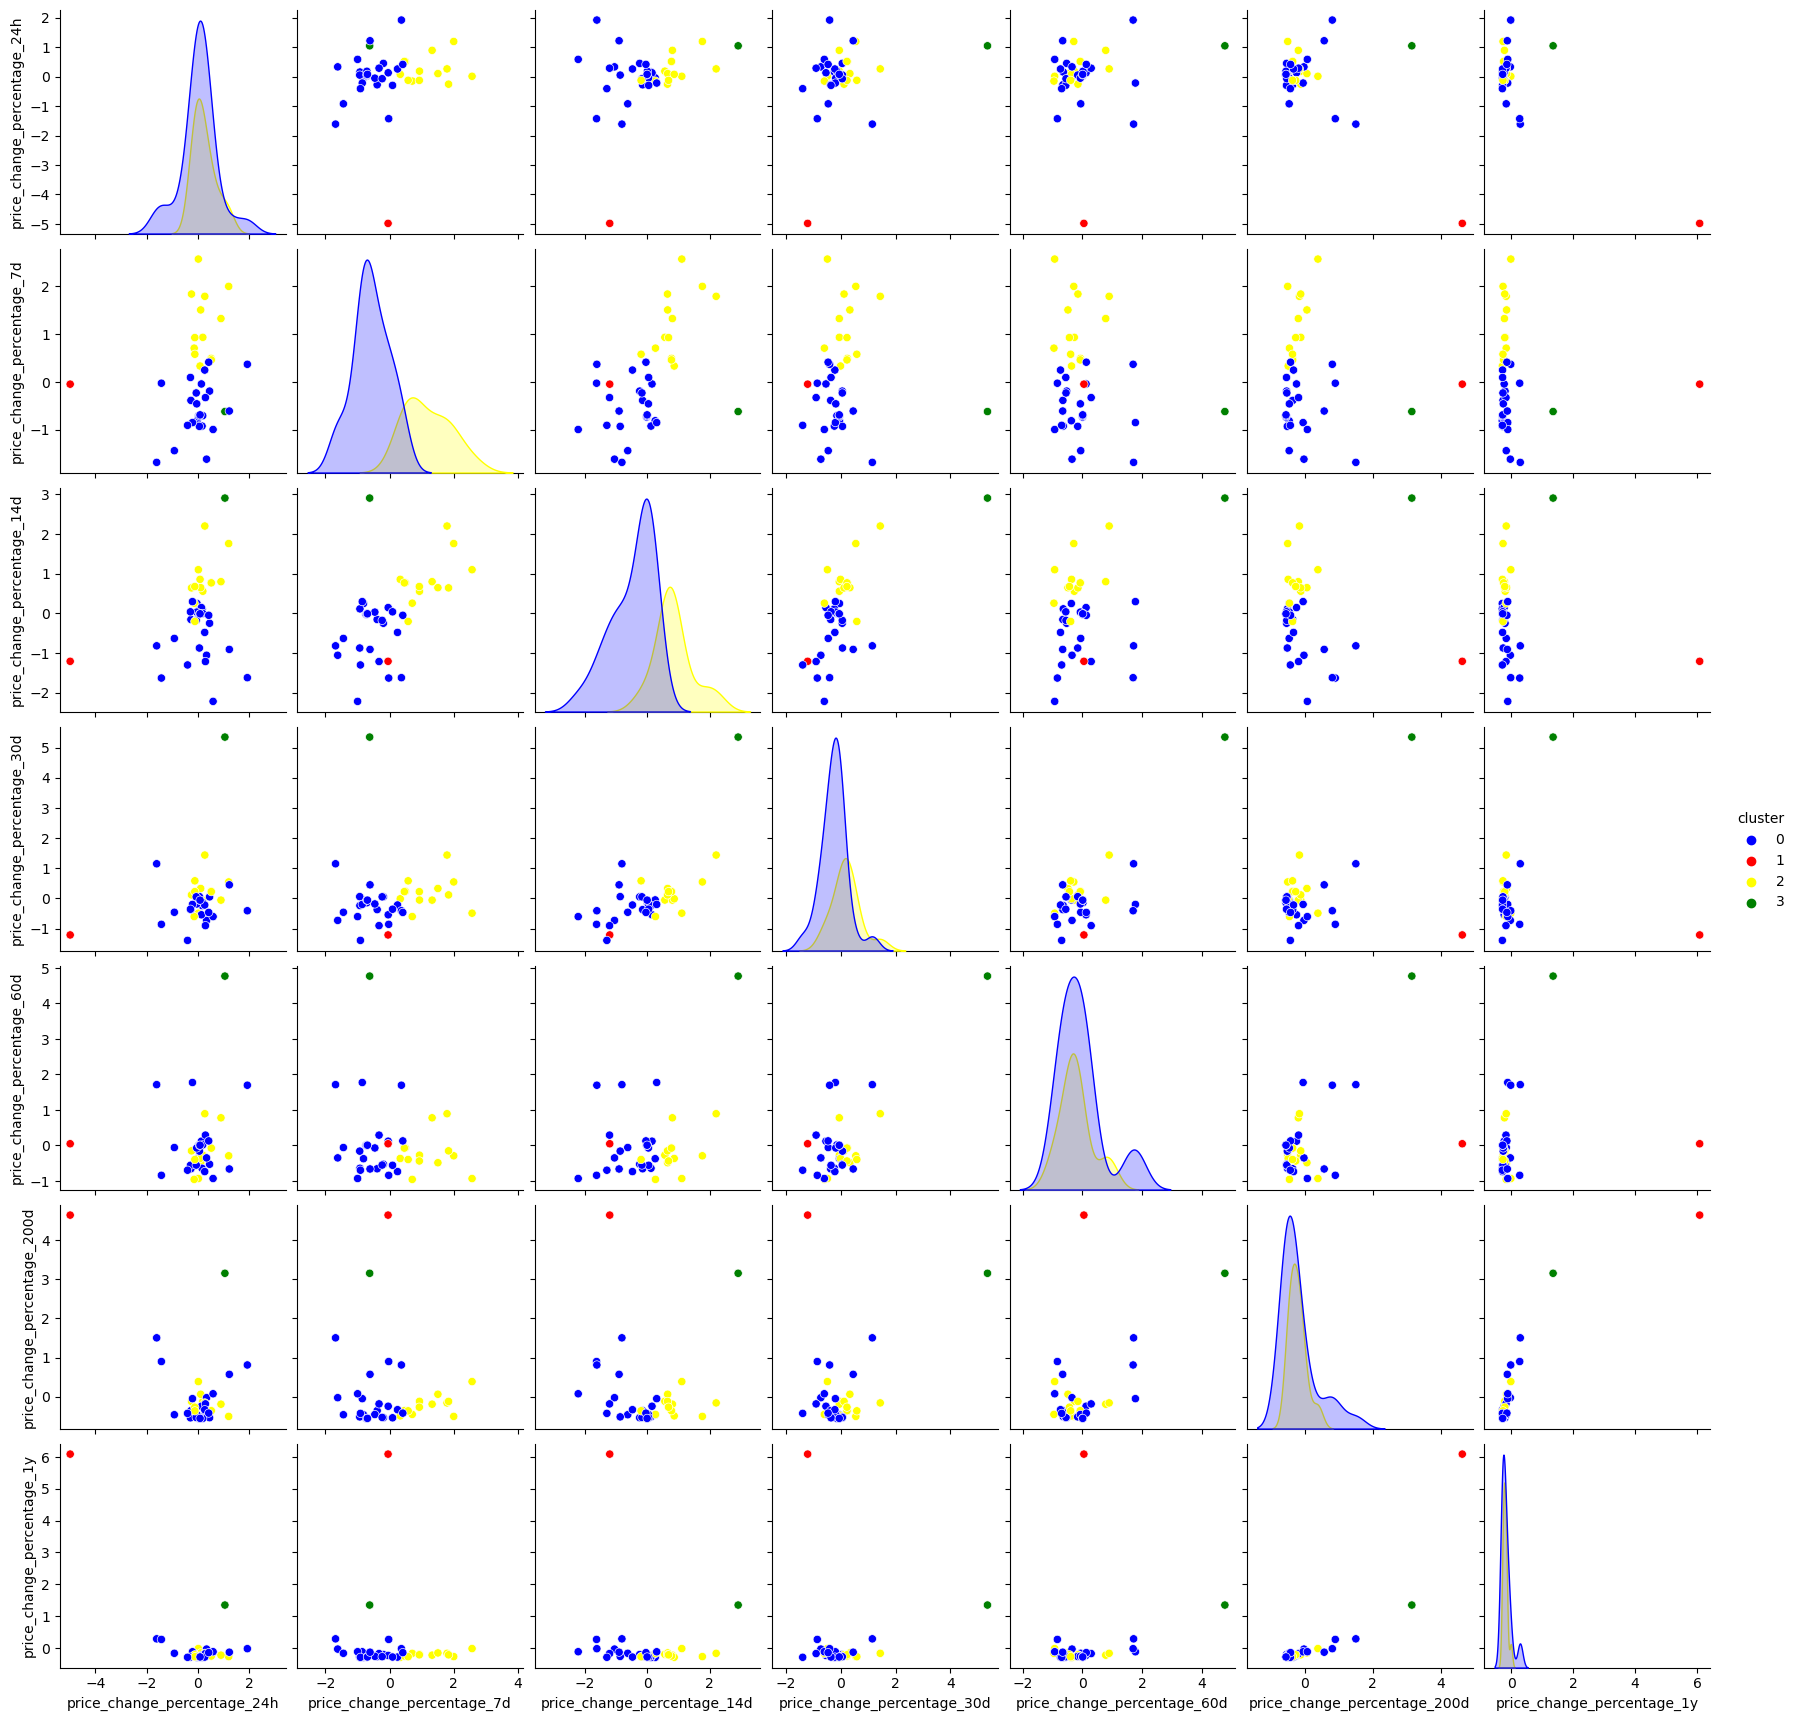

In [18]:
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom palette
custom_palette = {0: 'blue', 1: 'red', 2: 'yellow', 3: 'green'}

# Generate pair plot colored by cluster with the custom palette
sns.pairplot(df_market_data_scaled_predictions_kmeans, hue='cluster', palette=custom_palette)
plt.show()

---

### Optimise Clusters with Principal Component Analysis.

**Principal Component Analysis (PCA):** 

This is a dimensionality reduction technique used to reduce the number of features while retaining most of the variance in the data. By setting n_components=3, we reduce the data to three dimensions, making it easier to visualise and interpret, especially when dealing with high-dimensional data.

In [19]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [20]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)

# Create a DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3"])
df_pca["coin_id"] = df_market_data.index
df_pca.set_index("coin_id", inplace=True)

# View the first five rows of the DataFrame.
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [21]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance by summing the explained variances.
total_explained_variance = sum(explained_variance)

print(f'Total explained variance by the three components: {total_explained_variance:.3f}')


Total explained variance by the three components: 0.895


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance by the three principal components is `0.895` 

---

### Find the Best Value for k Using the PCA Data

In [22]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1, 12))

In [23]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:

for i in k_pca:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_pca = KMeans(n_clusters=i, random_state=2)
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans_pca.fit(df_pca)
    # 3. Append the model.inertia_ to the inertia list
    inertia_pca.append(kmeans_pca.inertia_)
    


c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:

In [24]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data_pca = {"k": k_pca, "inertia": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_curve_pca = pd.DataFrame(elbow_curve_data_pca)

df_elbow_curve_pca.head()

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.878747


In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_curve_pca.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve - Determining the Optimal Number of Clusters (PCA Data)",
    xticks=k_pca
)


:Curve   [k]   (inertia)

In [26]:
# Additional Code for Future Reference:
# Using kneed to find the optimal number of clusters

# Use the KneeLocator to find the optimal number of clusters
kneedle = KneeLocator(
    df_elbow_curve_pca["k"], df_elbow_curve_pca["inertia"],
    curve="convex",
    direction="decreasing"
)

# Print the optimal number of clusters
optimal_clusters = kneedle.elbow
print(f"The optimal number of clusters is: {optimal_clusters}")

The optimal number of clusters is: 4


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for `k` when using the PCA data is `4`.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best value for `k` when using the PCA data is `4`, which is the same as the best value found using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [27]:
# Initialize the K-means model with the optimal number of clusters
kmeans_pca = KMeans(n_clusters=optimal_clusters, random_state=2)

In [28]:
# Fit the K-means model to the PCA data
kmeans_pca.fit(df_pca)

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=2)

In [29]:
# Predict the clusters and add them to the PCA DataFrame
df_pca['cluster'] = kmeans_pca.predict(df_pca)

# Create a copy of the DataFrame with the PCA data without the 'cluster' column for further use
df_pca_copy = df_pca.drop(columns=['cluster'], errors='ignore').copy()

# Add the predicted clusters to the copied DataFrame
df_pca_copy['cluster'] = kmeans_pca.predict(df_pca.drop(columns=['cluster'], errors='ignore'))

# Display sample data
df_pca_copy.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [31]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

df_pca_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters (K-Means) - Using PCA Data",
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


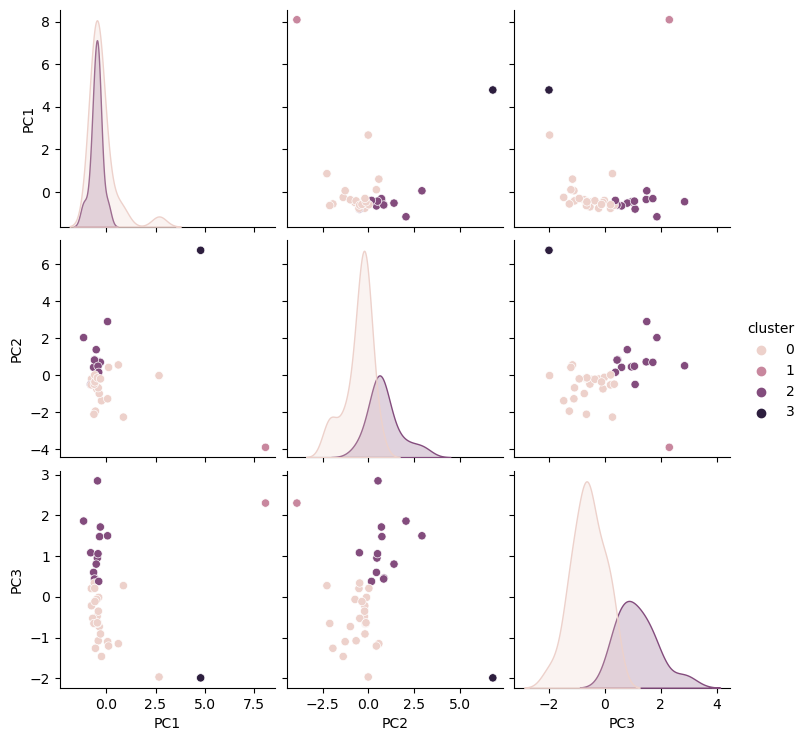

In [32]:
# Additional Code for Future Reference:
# Using seaborn to visualise all pairs of columns in the DataFrame.

import seaborn as sns
import matplotlib.pyplot as plt

# Generate pair plot colored by cluster
sns.pairplot(df_pca_copy, hue='cluster')
plt.show()


c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


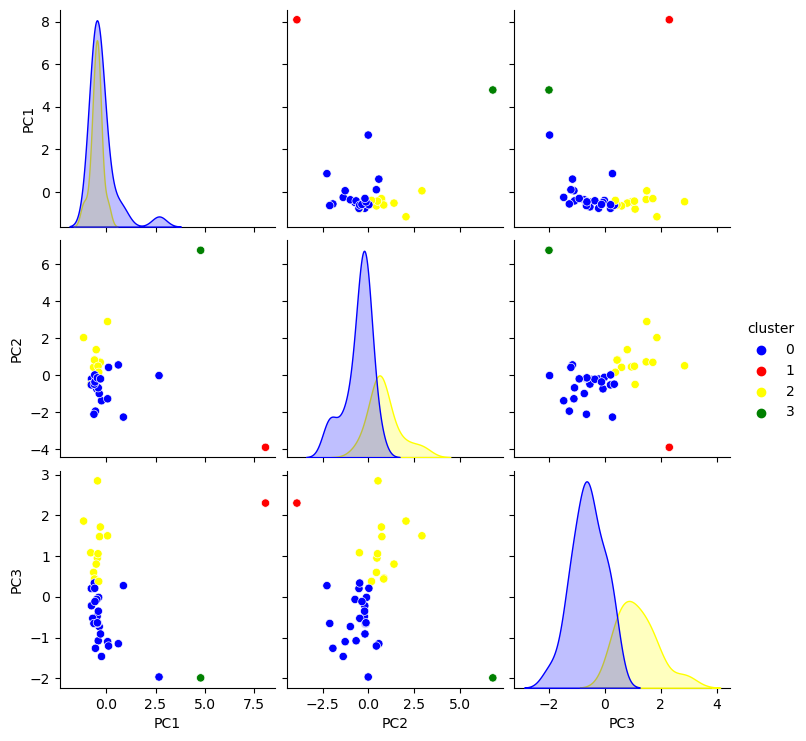

In [33]:
# Define a custom palette
custom_palette = {0: 'blue', 1: 'red', 2: 'yellow', 3: 'green'}

# Generate pair plot colored by cluster with the custom palette
sns.pairplot(df_pca_copy, hue='cluster', palette=custom_palette)
plt.show()

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

In [38]:
# Composite plot to contrast the Elbow curves
# Plot the elbow curve for the original scaled data
df_elbow_curve_original = pd.DataFrame({
    "k": list(range(1, 12)),
    "inertia": inertia
})
elbow_curve_original = df_elbow_curve_original.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve - Original Data",
    xticks=k_pca
)

# Plot the elbow curve for the PCA data
elbow_curve_pca = df_elbow_curve_pca.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve - PCA Data",
    xticks=k_pca
)

# Composite plot to contrast the Elbow curves
composite_elbow_curve = elbow_curve_original + elbow_curve_pca
composite_elbow_curve

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarn

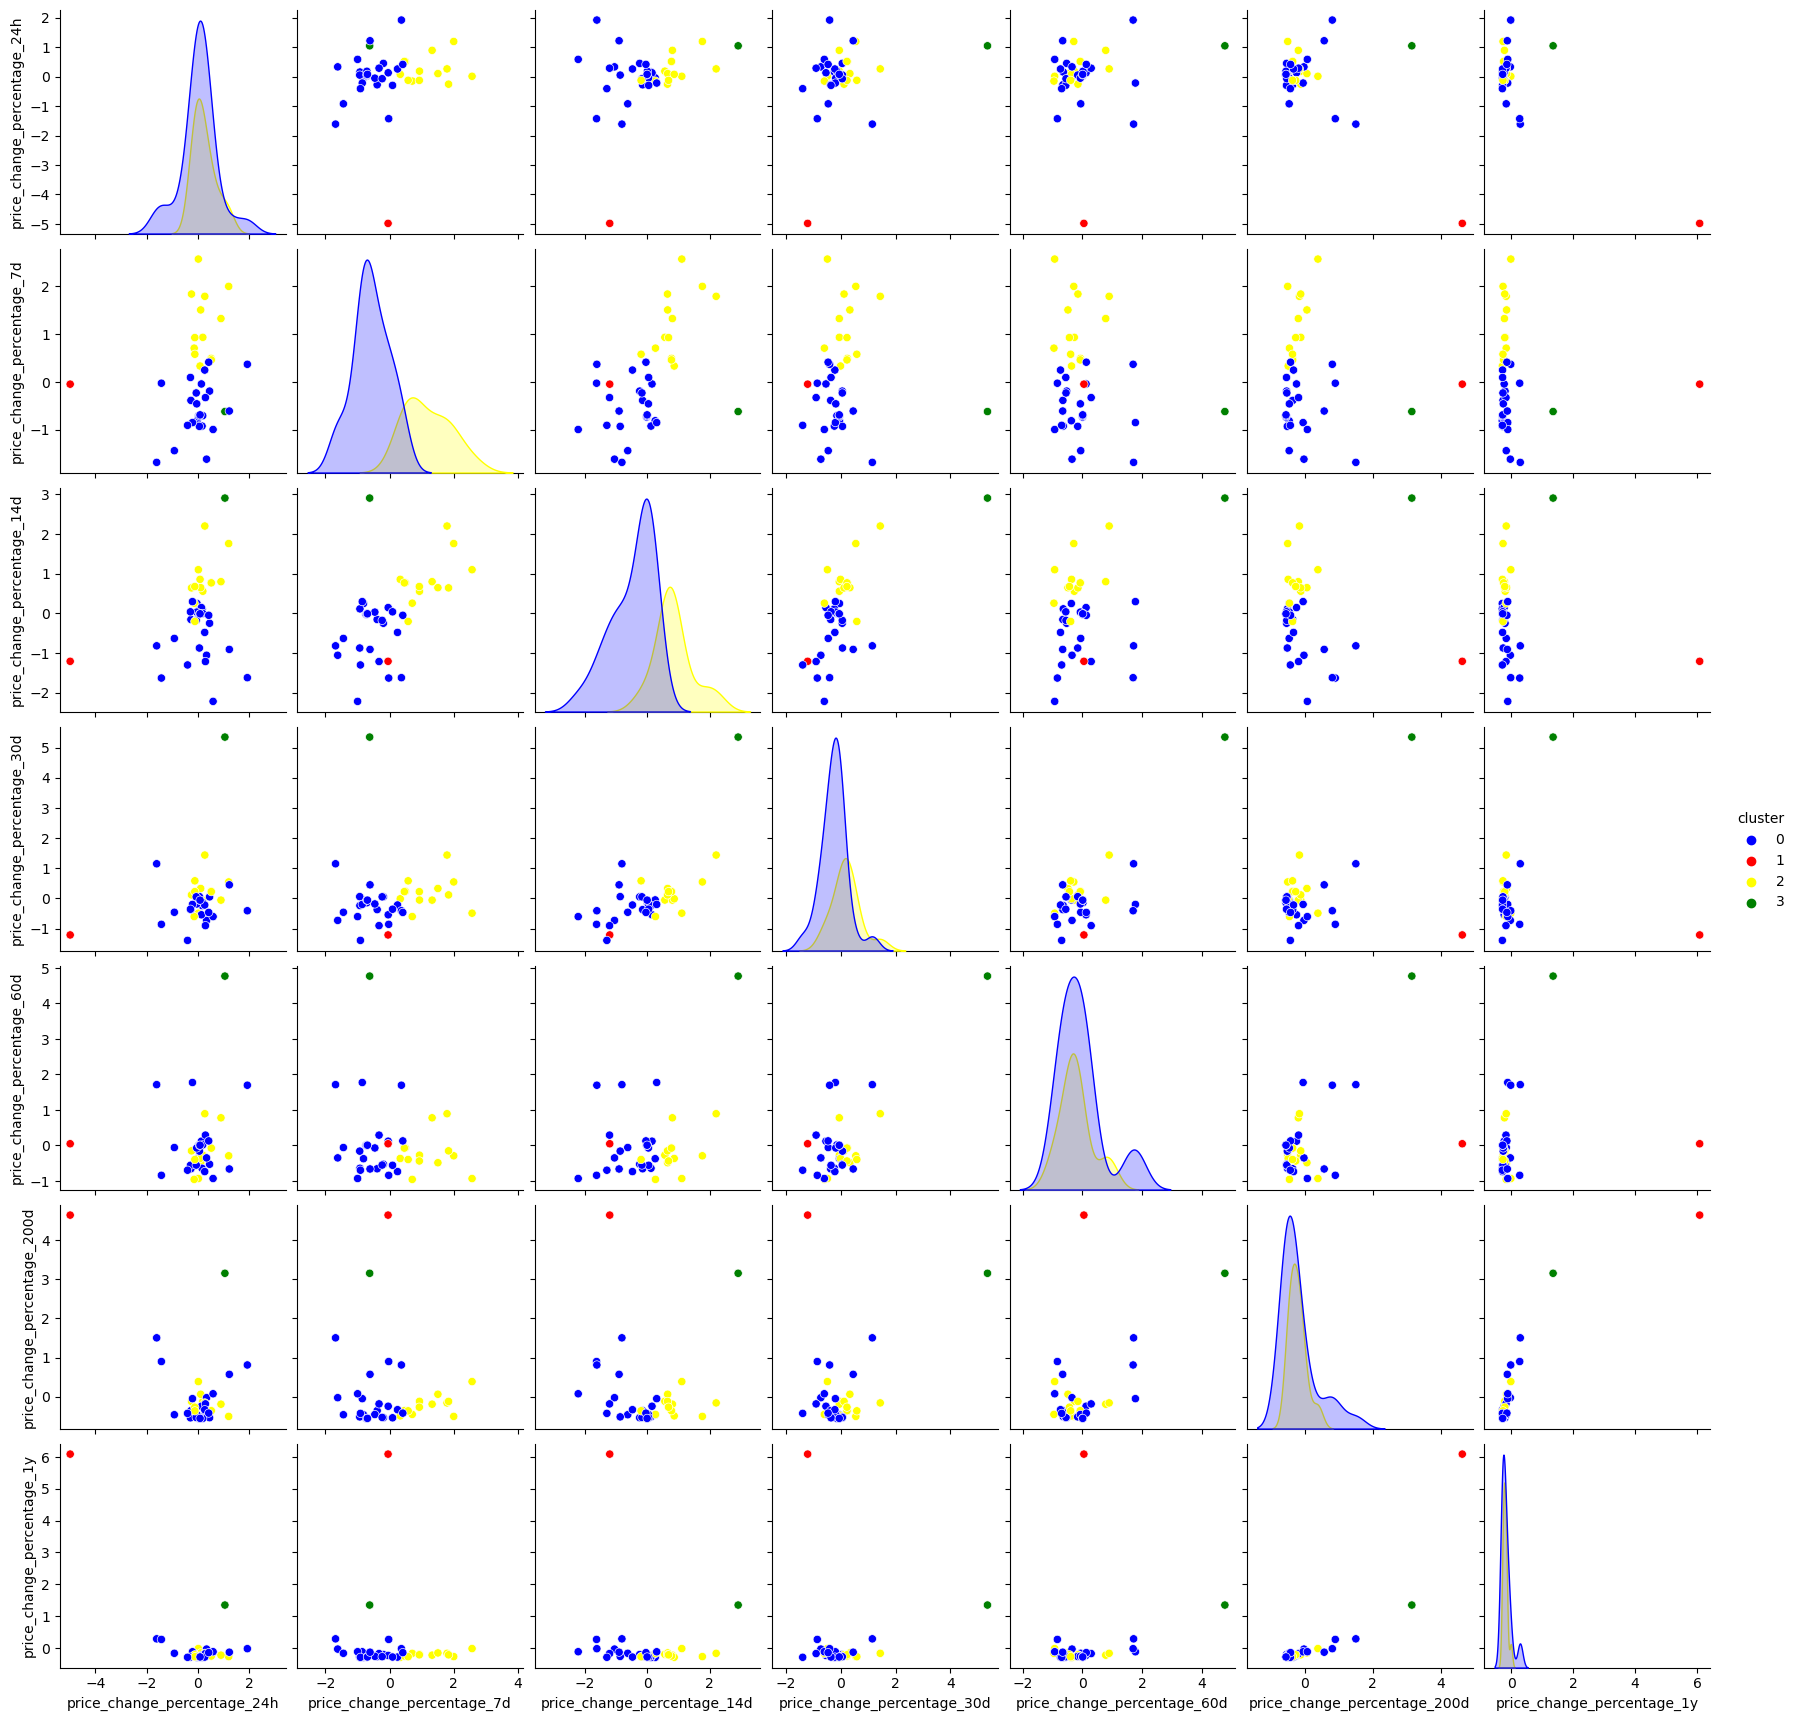

In [40]:
# Composite plot to contrast the clusters
kmeans_original = KMeans(n_clusters=optimal_clusters, random_state=2)
df_market_data_scaled_predictions_kmeans['cluster'] = kmeans_original.fit_predict(df_market_data_scaled_predictions_kmeans)

# Create pair plot for original scaled data
pair_plot_original = sns.pairplot(df_market_data_scaled_predictions_kmeans, hue='cluster', palette=custom_palette)
plt.show()

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


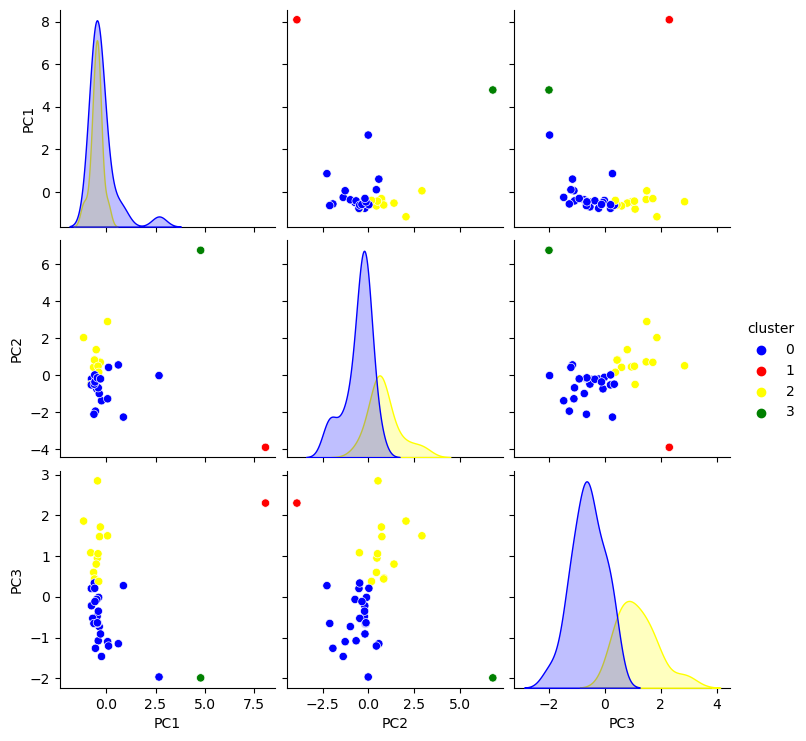

In [41]:
# Create pair plot for PCA data
pair_plot_pca = sns.pairplot(df_pca_copy, hue='cluster', palette=custom_palette)
plt.show()

#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
Using fewer features through PCA for clustering has several notable impacts:

**1. Clearer Separation of Clusters:**

In the PCA-transformed data, clusters are more clearly separated across all plots. This indicates that PCA effectively reduces dimensionality while retaining most of the variance (total explained variance of 0.895), leading to better-defined clusters.

**2. Reduced Overlaps:**

The original K-Means clustering on the full set of features shows overlaps in many of the plots, depending on the variables being plotted. This overlap is reduced in the PCA plots, suggesting that PCA helps in minimising the noise and redundant information that might cause overlaps in high-dimensional space.

**3. Visualisation and Interpretation:**

PCA reduces the data to three principal components, making it easier to visualise and interpret the clusters in a three-dimensional space. This is especially useful when dealing with high-dimensional data where visualisation can be challenging.

**4. Efficiency in Clustering:**

The clustering process becomes more efficient with fewer features. PCA reduces the complexity of the data, which can lead to faster computation times and improved performance of the K-Means algorithm.

Note: This is qualitatively evident when one runs the code above.

**5. Information Loss:**

While PCA retains most of the variance, there is still some loss of information because it reduces the data to a few principal components. This might affect the granularity of the clusters, potentially leading to less detailed insights compared to using the full set of features.

Summary

Overall, using PCA to reduce the number of features before clustering with K-Means results in clearer and more distinct clusters, reduces overlaps, and enhances visualisation and interpretation. However, it is important to be mindful of the potential loss of detailed information due to dimensionality reduction.